Note: thingy.

Current Updates:
- finally found a method to make pretty colors. I spent a whole morning doing this because of sunk cost fallacy and spite.
- should definitely work on a way to track outliers for each category and then compare their attributes against the general pop.


(Motivation) 

A dataset was compiled by Aayush Mishra that focused on the top 1000 Twitch streamers based on watch time. There are quite a few things that can be inferred from this data which we wanted to explore. We want to examine what would make channels outliers in each of the different categories of data, determine what makes channels so popular, and see what sort of trends come out of the outlying channels.

One very important thing to understand about this dataset is that this data was collected **before** the COVID-19 pandemic. According to [this website](https://twitchtracker.com/statistics/watch-time) tracking Twitch's overall watch time, the pandemic nearly *doubled* the amount of watch time Twitch was receiving, and that trend continued well into 2021.

### Data collection/wrangling
This dataset is already pretty useful on its own, as it's exactly 1000 data points with nothing missing. So we're simply going to use pandas to read the CSV file, and then after that, create some scatterplots to do some preliminary comparisons.

In [44]:
# Libraries for data wrangling and transformation
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
# Libraries for data analysis
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Miscellaneous
from datetime import datetime
from matplotlib import cm
import matplotlib.colors as mcolors

In [107]:
data = pd.read_csv("twitchdata-update.csv")
# Dropping attributes unused in our analysis
data = data.drop(['Partnered','Mature'],axis = 1)

# Modifying data with extra rows for analysis/cleaning
def convertwt(row):
    n = float(row["Watch time(Minutes)"])/60/60
    return n
def convertst(row):
    n = float(row["Stream time(minutes)"])/60/60
    return n

data["Watch time(days)"] = data.apply(lambda row: convertwt(row),axis = 1)
data["Stream time(days)"] = data.apply(lambda row: convertst(row),axis = 1)
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Language,Watch time(days),Stream time(days)
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,English,1.721156e+06,59.791667
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,English,1.692133e+06,58.845833
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,Portuguese,1.567942e+06,143.133333
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,English,1.102866e+06,143.816667
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,English,1.019722e+06,34.350000


### Data representation
Because of the large number of variables we can use to find outliers, draw conclusions, and make comparisons, we will create several scatterplots, each of which showcases a different relationship. First, our thought process went to comparing follower counts to average viewers, to see if one had any bearing on the other.

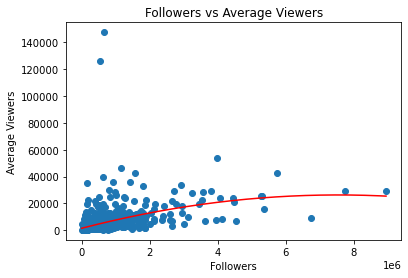

In [84]:
plt.scatter(data["Followers"], data["Average viewers"])

# Customized fit function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

# Fitting the data
popt, _ = curve_fit(objective, data["Followers"], data["Average viewers"])
a, b, c = popt
x_line = np.arange(min(data["Followers"]), max(data["Followers"]), 0.8)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, color='red')
plt.title("Followers vs Average Viewers")
plt.xlabel("Followers")
plt.ylabel("Average Viewers")
plt.show()

It appears that most of the channels follow the curve except those two outliers. We will return to those in a bit. Next, we examined how stream time and watch time correlate to average and peak viewerships.

The main reason we examined average viewers as well as peak viewers is the type of channels that each one would favor. Our assumption is as follows: average viewers generally represent a much more stable viewership, even if overall, the numbers are a bit lower. Using peak viewers causes channels that host large events, but otherwise don't stream much else, to show much larger numbers.

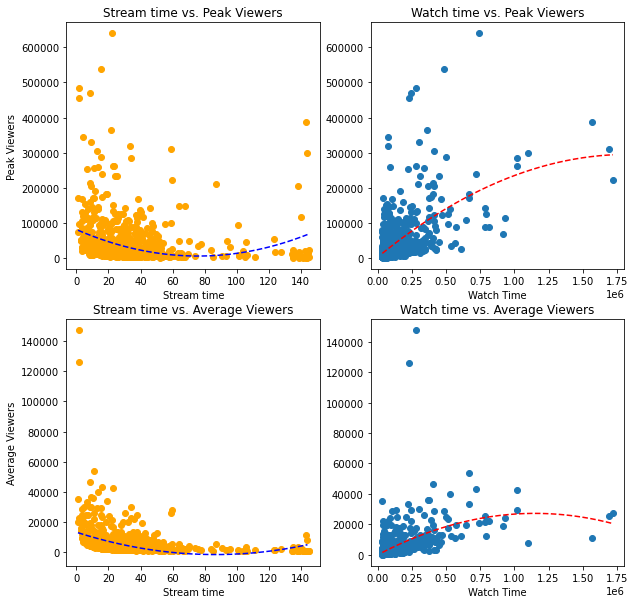

In [116]:
plt.figure(figsize=(10,10))
# Subplot 1
c1 = plt.subplot(2,2,1)
c1 = plt.scatter(data["Stream time(days)"], data["Peak viewers"], color = "orange")
plt.title("Stream time vs. Peak Viewers")
plt.ylabel("Peak Viewers")
plt.xlabel("Stream time")

popt, _ = curve_fit(objective, data["Stream time(days)"],  data["Peak viewers"])
a, b, c = popt
x_line = np.arange(min(data["Stream time(days)"]), max(data["Stream time(days)"]), 0.8)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='blue')

# Subplot 2
c2 = plt.subplot(2,2,2)
c2 = plt.scatter(data["Watch time(days)"], data["Peak viewers"])
plt.title("Watch time vs. Peak Viewers")
plt.xlabel("Watch Time")

popt, _ = curve_fit(objective, data["Watch time(days)"],  data["Peak viewers"])
a, b, c = popt
x_line = np.arange(min(data["Watch time(days)"]), max(data["Watch time(days)"]), 0.8)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')


# Subplot 3
c1 = plt.subplot(2,2,3)
c1 = plt.scatter(data["Stream time(days)"], data["Average viewers"], color = "orange")
plt.title("Stream time vs. Average Viewers")
plt.xlabel("Stream time")
plt.ylabel("Average Viewers")

popt, _ = curve_fit(objective, data["Stream time(days)"],  data["Average viewers"])
a, b, c = popt
x_line = np.arange(min(data["Stream time(days)"]), max(data["Stream time(days)"]), 0.8)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='blue')

# Subplot 4
c2 = plt.subplot(2,2,4)
c2 = plt.scatter(data["Watch time(days)"], data["Average viewers"])
plt.title("Watch time vs. Average Viewers")
plt.xlabel("Watch Time")

popt, _ = curve_fit(objective, data["Watch time(days)"], data["Average viewers"])
a, b, c = popt
x_line = np.arange(min(data["Watch time(days)"]), max(data["Watch time(days)"]), 0.8)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')

plt.show()

We still see outliers in these data, although it's becoming more clear that the "average viewers" outliers are very specific, and we will get into that shortly.

In order to remove languages as a potential bias, we decided to group the data by language and examine each of them separately.

In [183]:
#Counting the languages
lang = data["Language"].unique()
langs = data.groupby(["Language"])["Channel"].count().sort_values(axis=0,ascending=False)
langs

Language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Greek           1
Slovak          1
Finnish         1
Swedish         1
Name: Channel, dtype: int64

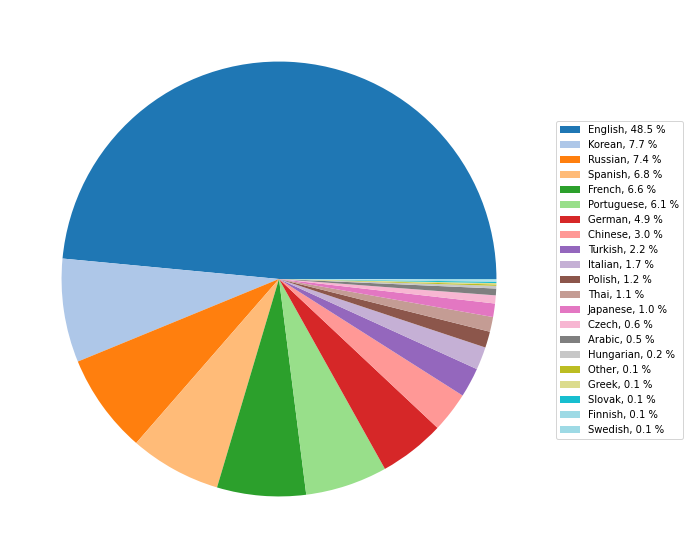

In [80]:
cmap = cm.tab20(np.arange(lang.size))

fig1, ax1 = plt.subplots(figsize=(10,10))
pichart = ax1.pie(langs,colors=cmap)
percents = langs.values * 100 / langs.values.sum()
legend = ['%s, %1.1f %%' % (l, s) for l, s in zip(langs.index,percents)]
plt.legend(labels = legend
           ,bbox_to_anchor=(1,0.8))

As can be seen here, English is the majority, so it is important to partition the data by language so that region-specific outliers wouldn't be hidden by the sheer amount of English-language streams.

Text(0.5, 1.0, 'Followers by Language')

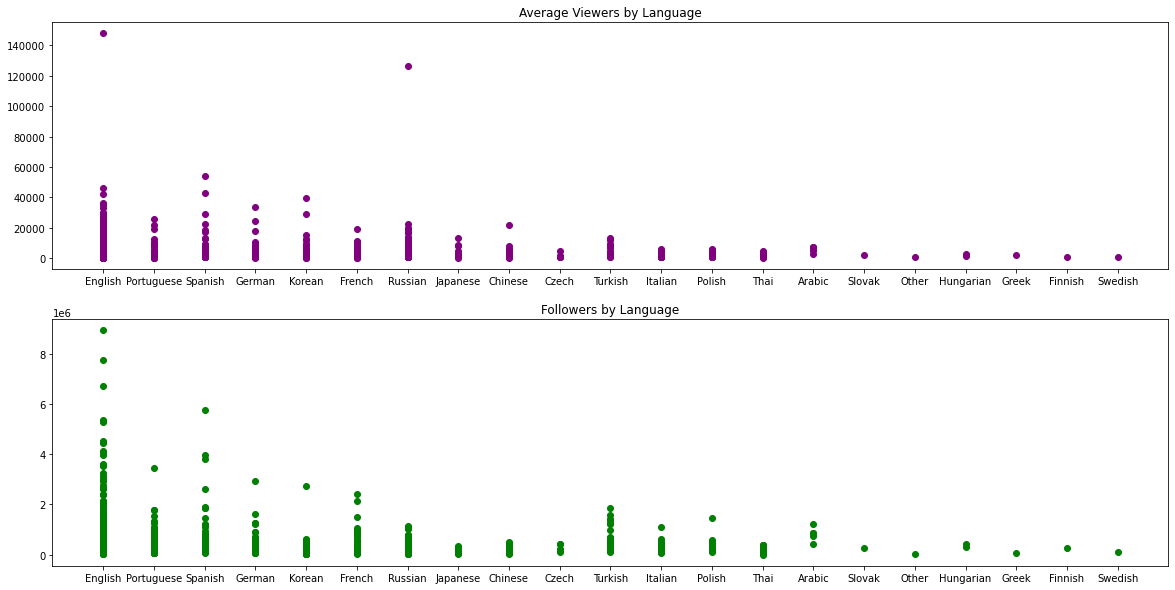

In [288]:
plt.figure(figsize=(20,10))   
l1 = plt.subplot(2,1,1)
l1 = plt.scatter(data["Language"], data["Average viewers"], color = "purple")
plt.title("Average Viewers by Language")
l2 = plt.subplot(2,1,2)
l2 = plt.scatter(data["Language"],data["Followers"],  color = "green")
plt.title("Followers by Language")

Notes:
- viewers and followers appear to be following a similar pattern?
- lmfao whos that one russian channel in the first plot

Next, we will create boxplots for each language's data.

Text(0.5, 1.0, 'Stream time by Language (days)')

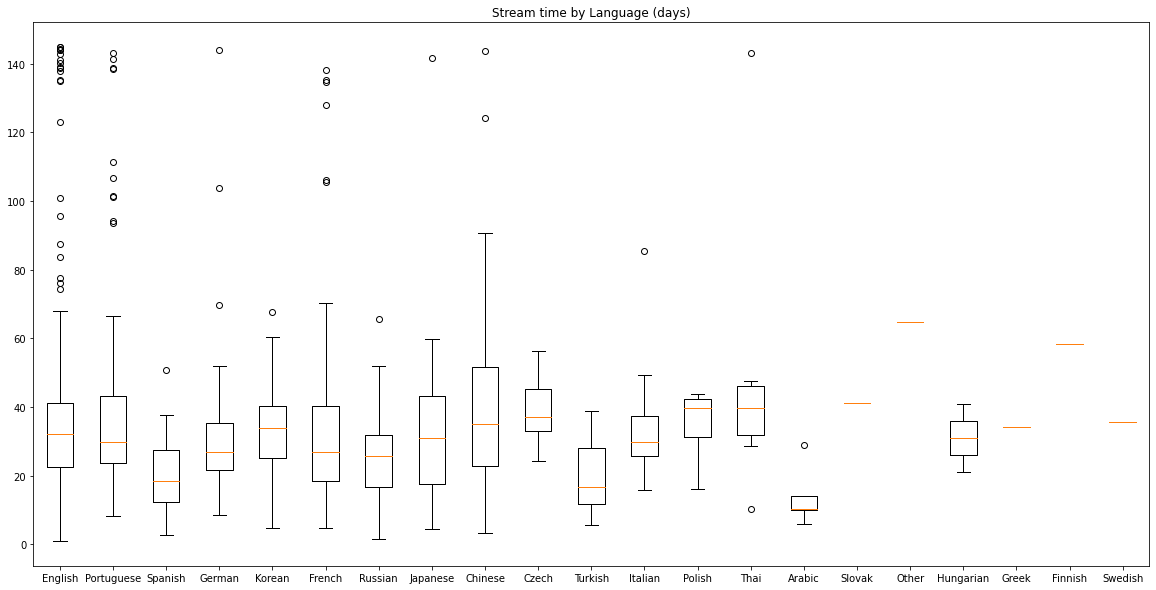

In [8]:

#Creating stream time arrays for each language
st = []
for l in lang:
    ar = []
    ct = data[data["Language"] == l]
    for le in ct["Stream time(days)"]:
        ar.append(le)
    st.append(ar)

plt.figure(figsize=(20,10))
box = plt.boxplot(st,labels=lang)
plt.title("Stream time by Language (days)")

Notes:
- seems like even with the distributions, there's a general mean/trend in terms of stream time. the extremes seem to be more present in the more "populated" languages as expected (more channels = more variation)
- English still has the most "extremes" though it could be balanced out by being the majority (48%)
- Exceptions to this pattern: Thai with this 1 extreme channel despite the low percent

Important to understand is that some channels have multiple viewer counts that are split between different sources. Looking at the data, there are a few channels all under the same name-- take, for example, Riot Games. Out of the 1000 top channels in the dataset, 6 of them are all under Riot Games, each with their own region. Thus, one way we will be analyzing the data is by separating the channels by language to do further analysis. Then, it will be useful to analyze the channels after removing the big gaming channels to see what sort of outliers still remain.

### Investigating outliers in the exploratory data

In [17]:
#Case 1: Average Viewers
eng = data[data["Language"] == "English"].sort_values(axis=0,by='Average viewers',ascending=False)
eng.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English,1.754167
41,LCS,1461310140,31125,214124,46459,1162746,526244,28313058,True,False,English,8.645833
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English,22.850000
52,RocketLeague,1322448480,33540,206681,36086,1409120,412101,57189129,True,False,English,9.316667
46,LCK,1351758525,37140,171861,36030,934688,307853,28970100,True,False,English,10.316667


Stream time for DOTA 2 is significantly low compared to the other members of the group. That said, among the English streams, despite only streaming for 1.75 days, they received by far the highest viewer counts. Upon researching, this channel and its Russian counterpart are for The International (TI), a very large DOTA 2 event that took place in Shanghai in 2019. This would explain the extremely high average viewers, as the event was barely 2 days long, and it has nothing else in the year to drag the average down. So in conclusion, the reason these channels are outliers are specifically because they are **only** used for this event each year. Comparing this to LCS (League of Legends Championship Series), which totaled 8.6 days of stream time, but only averaged about 1/3 of what TI did.

Next, we will look at the Russian stream data.

In [20]:
rus = data[data["Language"] == "Russian"].sort_values(axis=0,by='Average viewers',ascending=False)
rus.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
109,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian,1.720833
811,DreamHackDota2_RU,152461155,6135,98717,22356,203419,30231,3637232,True,False,Russian,1.704167
319,RiotGamesRU,352700745,17880,73049,19753,173861,75538,6832561,True,False,Russian,4.966667
39,dota2mc_ru,1464683175,66675,182869,19495,428284,156721,38774178,True,False,Russian,18.520833
53,csgomc_ru,1308967860,77955,364816,17020,492954,447601,42952835,True,False,Russian,21.654167


Once again, we can see DOTA 2's TI at the top of this list. Interestingly, the top Russian-language streams all happen to be eSports and events.

Next, we examine the top follower counts of the dataset.

In [28]:
#English followers
data.sort_values(axis=0,by='Followers',ascending=False).head(6)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,34.350000
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English,8.400000
35,Myth,1479214575,134760,122552,9396,6726893,1421811,37384058,True,False,English,37.433333
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish,16.187500
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English,15.695833
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,58.845833


In [30]:
thai = data[data["Language"] == "Thai"].sort_values(axis=0,by='Stream time(days)',ascending=False)
thai.head(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
758,voicetv,162510660,514845,1874,314,3660,1328,4001475,True,False,Thai,143.012500
633,NoctisAK47,189081300,171270,7264,1052,73584,41176,6381664,True,True,Thai,47.575000
511,FifaTargrean,231025755,170820,6721,1353,396862,66121,7798628,True,False,Thai,47.450000
769,Tanxlive,159875505,161010,6899,971,244133,40087,7067999,True,True,Thai,44.725000
320,FPSThailand,351025410,158640,38563,2260,390579,74894,18596656,True,False,Thai,44.066667


voicetv turns out to be [VoiceTV](https://www.twitch.tv/voicetv/about), a Thai television channel. The stream time would make sense with the channel running day-long news broadcasts and other features shared by a traditional cable news channel.

In [32]:
r = data[data["Channel"].str.contains("Riot")]
r

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English,22.450000
58,RiotGamesBrazil,1228613130,38370,255542,25918,1011924,325801,33796768,True,False,Portuguese,10.658333
282,RiotGamesJP,390922410,26325,60682,13675,141684,36105,9101692,True,False,Japanese,7.312500
319,RiotGamesRU,352700745,17880,73049,19753,173861,75538,6832561,True,False,Russian,4.966667
681,RiotGamesTurkish,177746055,23835,36258,7414,651994,49244,9998277,True,False,Turkish,6.620833
916,RiotGamesOCE,132387150,40890,50458,3076,149775,65748,8437414,True,False,English,11.358333


In [31]:
c = data[data["Channel"].str.contains("CSGO")]
c

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream time(days)
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,143.816667
346,ESL_CSGOb,325637220,52530,89949,5114,575769,183662,13742820,True,False,English,14.591667
964,ESL_CSGO_FR,126026325,53295,22857,2570,193614,26073,4124889,True,False,French,14.804167


- Riot started on the esports as their main funding, globalized quickly vs CSGO



Note about future changes that might affect these dynamics due to the dataset being dated 2 years:
- esports becoming mainstream, further increasing it's lead 
- recent trends such as subathons, special events where a given stream is extended via monetary subscriptions, affecting Stream time as a variable
- Covid

